In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

filepath = r"C:\Users\jjap2\Poleto SCE\Poleto-SCE\dond_game_data.csv"
df = pd.read_csv(filepath)

In [2]:
samplesize = df['Contestant Name'].nunique()
print("Sample size:", samplesize)
# this number is incorrect because of duplicate names for contestants, i think there's 102?

Sample size: 99


In [3]:
df['Offer Percent of Average'].mean()

0.592478290909091

In [4]:
david = df[df['Contestant Name']=='David']
display(david)


,Game ID,Round,Contestant Name,Contestant Gender,Contestant Race,Remaining Values,Board Value,Board Average,Board Balance,Previous Offer,Offer,Offer Percent of Average,Deal,Amount Won,Postgame,Probability of Big Value
578,78,1,David,Male,Black,"[0, 5, 10, 50, 75, 200, 300, 400, 500, 1000, 5...",1917540,95877,0.880,0.0,38000.0,0.3963,0,0,0,0.250
579,78,2,David,Male,Black,"[5, 50, 75, 200, 400, 500, 1000, 5000, 10000, ...",1142230,76149,0.656,38000.0,29000.0,0.3808,0,0,0,0.267
580,78,3,David,Male,Black,"[5, 50, 200, 400, 500, 1000, 5000, 10000, 5000...",567155,51560,0.347,29000.0,24000.0,0.4655,0,0,0,0.182
581,78,4,David,Male,Black,"[5, 200, 400, 1000, 5000, 50000, 100000, 400000]",556605,69576,0.650,24000.0,45000.0,0.6468,0,0,0,0.250
582,78,5,David,Male,Black,"[5, 200, 400, 1000, 50000, 100000]",151605,25268,0.177,45000.0,19000.0,0.7520,0,0,0,0.167
583,78,6,David,Male,Black,"[5, 400, 1000, 50000, 100000]",151405,30281,0.264,19000.0,25000.0,0.8256,0,0,0,0.200
584,78,7,David,Male,Black,"[5, 400, 50000, 100000]",150405,37601,0.262,25000.0,30000.0,0.7978,0,0,0,0.250
585,78,8,David,Male,Black,"[5, 400, 50000]",50405,16802,0.087,30000.0,14000.0,0.8333,1,14000,0,0.000
656,88,1,David,Male,White,"[0, 1, 10, 25, 50, 75, 100, 200, 300, 500, 750...",2688011,134401,0.945,0.0,14000.0,0.1042,0,0,0,0.250
657,88,2,David,Male,White,"[0, 10, 25, 200, 500, 750, 1000, 10000, 50000,...",2687485,179166,1.279,14000.0,48000.0,0.2679,0,0,0,0.333


In [5]:
win = df[df['Amount Won'] > 0]
# win['Round'].describe()
# win['Offer Percent of Average'].describe()
display(win)

,Game ID,Round,Contestant Name,Contestant Gender,Contestant Race,Remaining Values,Board Value,Board Average,Board Balance,Previous Offer,Offer,Offer Percent of Average,Deal,Amount Won,Postgame,Probability of Big Value
6,3,8,Pyong,Male,Asian,"[75, 750, 750000]",750825,250275,0.643,291000.0,211000.00,0.8431,1,211000,0,0.333
12,1,4,Tony,Male,White,"[25, 750, 5000, 10000, 50000, 200000, 300000, ...",1065775,133222,0.972,169000.0,94000.00,0.7056,1,94000,0,0.375
24,4,5,Cha Cha,Female,White,"[25, 75, 100, 200, 400, 400000]",400800,66800,0.354,65000.0,49000.00,0.7335,1,49000,0,0.167
30,5,6,Eric,Male,Black,"[1, 50, 300, 25000, 300000]",325351,65070,0.655,51000.0,59000.00,0.9067,1,59000,0,0.200
43,7,5,Jessica,Female,White,"[1, 5, 10, 400, 75000, 200000]",275416,45903,0.468,21000.0,40000.00,0.8714,1,40000,0,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,88,5,David,Male,White,"[25, 200, 500, 10000, 300000, 750000]",1060725,176788,1.034,117000.0,83000.00,0.4695,1,100000,0,0.333
800,104,9,Tony,Male,White,"[0, 100]",100,50,0.041,40.0,70.00,1.4000,1,70,0,0.000
806,105,6,Janelle,Female,Black,"[10, 10000, 200000, 400000, 500000]",1110010,222002,78.506,103000.0,165000.00,0.7432,1,165000,0,0.600
815,106,7,George,Male,Hispanic,"[75, 100, 300, 750000]",750475,187619,1.117,277000.0,119000.00,0.6343,1,119000,0,0.250


# split Remaining Values

problems with the data:
- multiple tony's (does this even matter)
- splitting remaining values column
- figure out what to with prob big value (maybe toss it)

findings:
- mean round win is 7.08, med is 7
- mean offer percent of average = .7351, med .8321
- postgame = 1 just means after they win, they go through the remainder of what they would have done
- prob big value is just how likely are you to get a case with over $100,000

decisions: 
- will go based off game id

<function matplotlib.pyplot.show(close=None, block=None)>

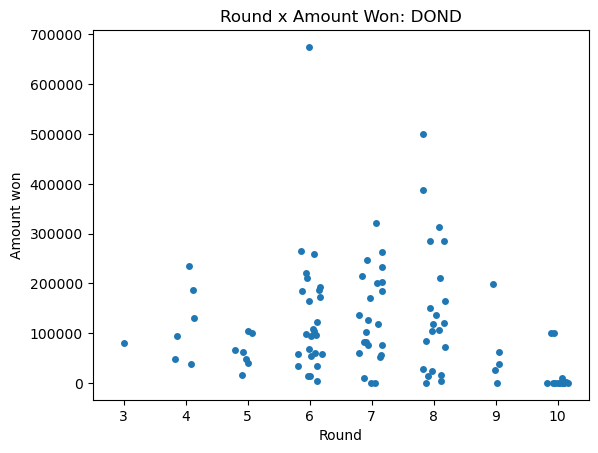

In [6]:
sns.stripplot(data=win, x='Round', y='Amount Won', jitter=.2)
plt.xlabel('Round')
plt.ylabel('Amount won')
plt.title('Round x Amount Won: DOND')

plt.show

In [7]:
win['Amount Won'].describe()

count       102.000000
mean     112705.441176
std      112469.834686
min           5.000000
25%       29500.000000
50%       89500.000000
75%      171500.000000
max      675000.000000
Name: Amount Won, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

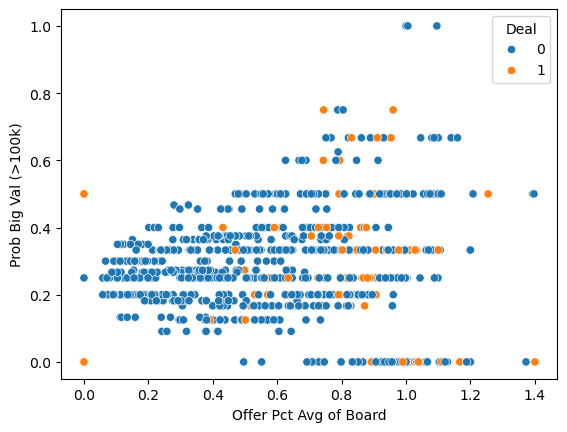

In [8]:
sns.scatterplot(data=df, x='Offer Percent of Average', y='Probability of Big Value', hue='Deal')
plt.xlabel('Offer Pct Avg of Board')
plt.ylabel('Prob Big Val (>100k)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

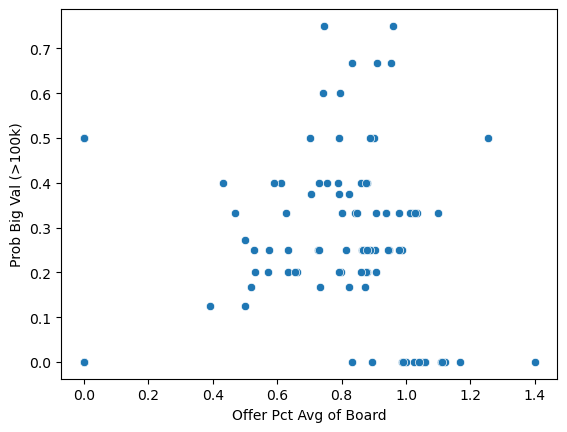

In [9]:
sns.scatterplot(data=win, x='Offer Percent of Average', y='Probability of Big Value')
plt.xlabel('Offer Pct Avg of Board')
plt.ylabel('Prob Big Val (>100k)')

plt.show

In [10]:
zero = df[df['Offer'] == 0]
display(zero)

,Game ID,Round,Contestant Name,Contestant Gender,Contestant Race,Remaining Values,Board Value,Board Average,Board Balance,Previous Offer,Offer,Offer Percent of Average,Deal,Amount Won,Postgame,Probability of Big Value
76,40,10,Tommy,Male,White,"[5, 200]",205,102,0.085,100.0,0.0,0.0,1,200,0,0.0
102,18,10,Wesley,Male,Black,"[25, 10000]",10025,5012,0.283,5000.0,0.0,0.0,1,25,0,0.0
137,24,10,Adalis,Female,Hispanic,"[300, 750]",1050,525,0.435,500.0,0.0,0.0,1,750,0,0.0
249,37,10,Peter,Male,White,"[75000, 100000]",175000,87500,0.051,83000.0,0.0,0.0,1,100000,0,0.5
325,46,10,Brooks,Male,White,"[10, 100]",110,55,0.046,50.0,0.0,0.0,1,10,0,0.0
368,50,10,Sherelyn,Male,White,"[400, 500]",900,450,0.373,425.0,0.0,0.0,1,500,0,0.0
378,51,10,Chris,Male,White,"[25, 10000]",10025,5012,0.283,4000.0,0.0,0.0,1,10000,0,0.0
425,57,10,Angela,Female,White,"[1, 1000]",1001,500,0.707,500.0,0.0,0.0,1,1000,0,0.0
567,75,10,Tunde,Female,Black,"[10000, 100000]",110000,55000,0.032,61000.0,0.0,0.0,1,100000,0,0.5
595,79,10,Vinny,Male,White,"[50, 100]",150,75,0.062,80.0,0.0,0.0,1,50,0,0.0


In [11]:
df["Remaining Values"] = df["Remaining Values"].apply(ast.literal_eval)

# Create a dictionary to store counts of each unique value
value_counts = {}

# Loop through the "Remaining Values" column to extract and count values
for remaining_list in df["Remaining Values"]:
    for value in remaining_list:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1

# Convert the result into a DataFrame for easier viewing
value_counts_df = pd.DataFrame(list(value_counts.items()), columns=["Value", "Count"])

# Sort the DataFrame by the "Count" in descending order
value_counts_df = value_counts_df.sort_values(by="Count", ascending=False)

# Display the result
print(value_counts_df)

      Value  Count
3     50000    328
22    10000    304
10        5    303
14      300    299
20  1000000    299
7    500000    296
8    750000    296
19   400000    296
6        75    291
17     1000    288
5    300000    286
24       10    284
23    75000    281
15      400    280
11       50    277
1       750    276
13      200    273
21        0    263
9         1    262
18   100000    261
16      500    249
0        25    248
12      100    247
4    200000    246
25    25000    243
2      5000    239
26  2000000     22
27   250000      8
36   600000      8
34     2000      7
28  3000000      7
37   800000      6
31       20      6
32      800      5
33     1500      4
35   150000      3
30        2      3
29  6000000      1
38    20000      1
39  1500000      1
